In [29]:
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

wine_bunch = datasets.load_wine()
wine_bunch.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [30]:
FEATURES = wine_bunch['feature_names']
TARGET = 'species'

wine_df = pd.DataFrame(wine_bunch['data'], columns=FEATURES)
wine_df[TARGET] = wine_bunch['target']

In [31]:
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,species
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [36]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
species                         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2578d47ad0>,
      dtype=object)

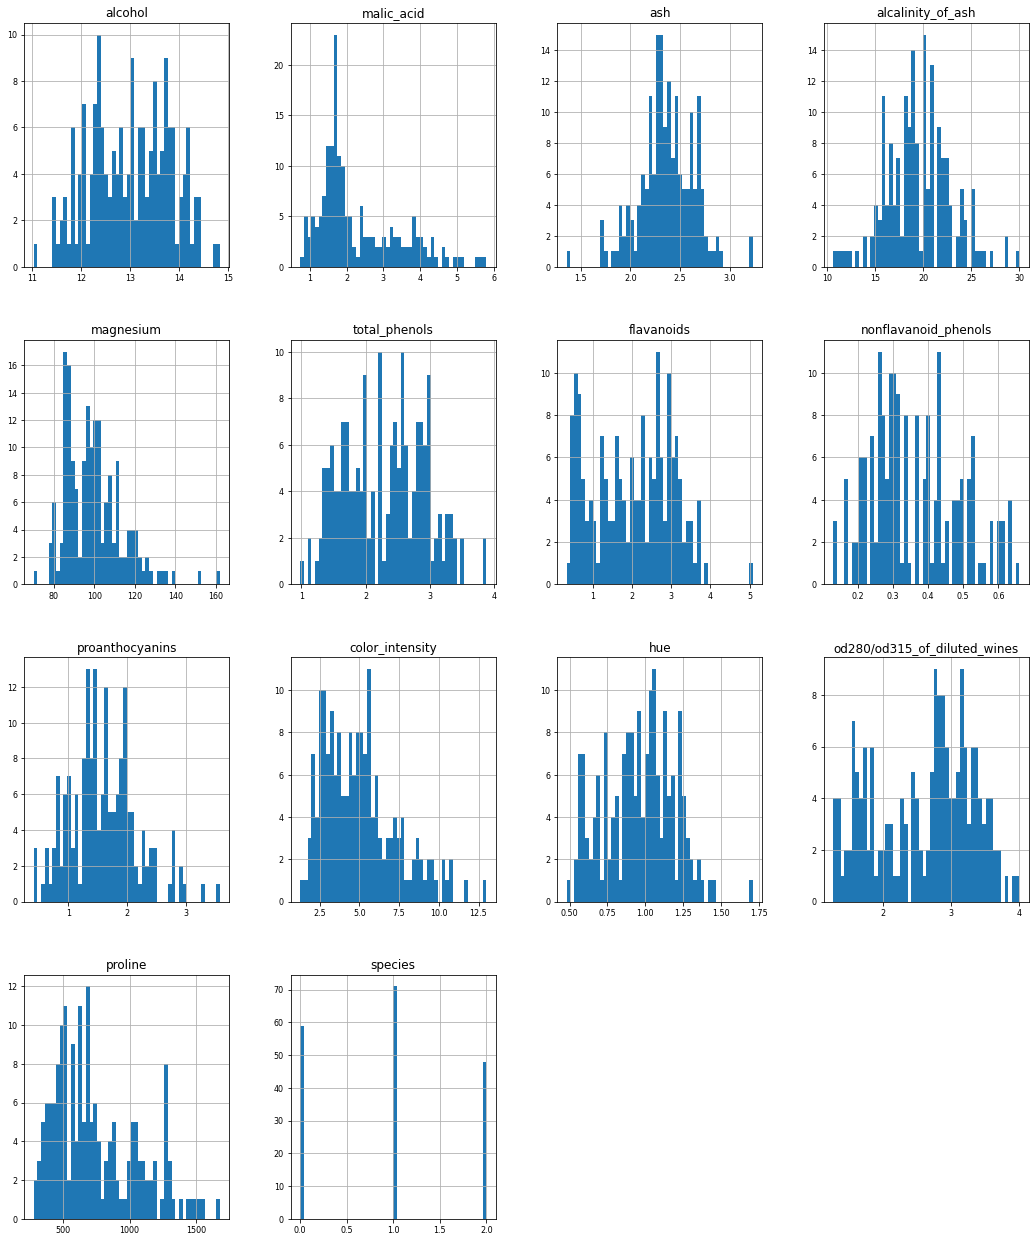

In [37]:
wine_df.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

Feature


In [39]:
X= wine_df.drop(['species'], axis=1)

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Labels


In [45]:
y= wine_df['species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Random Forest Clasifier


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [47]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [49]:
kriteria = ['gini', 'entropy']
for i in kriteria:
  rf = RandomForestClassifier(n_estimators=200, criterion=i)
  rf.fit(X_train, y_train)
  prediksi_rf = rf.predict(X_train)
  prediksi_rf_test = rf.predict(X_test)
  y_pred_rf = rf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_rf)
  print('Nilai Akurasi Random Forest pada Training Set dengan criterion = {}'.format(i), 'adalah', round(accuracy_score(prediksi_rf, y_train), 2))
  print('Nilai Akurasi Random Forest pada Testing Set dengan criterion = {}'.format(i), 'adalah', round(accuracy_score(prediksi_rf_test, y_test), 2), '\n')
  print(classification_report(y_test, y_pred_rf))
  print(cm)
  print('=======================================================================================================================================')

Nilai Akurasi Random Forest pada Training Set dengan criterion = gini adalah 1.0
Nilai Akurasi Random Forest pada Testing Set dengan criterion = gini adalah 0.96 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        23
           2       0.82      1.00      0.90         9

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 21  2]
 [ 0  0  9]]
Nilai Akurasi Random Forest pada Training Set dengan criterion = entropy adalah 1.0
Nilai Akurasi Random Forest pada Testing Set dengan criterion = entropy adalah 0.96 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        23
           2       0.82      1.00      0.90         9

    accuracy                  